# Using Archived Surface Data from Iowa State

This notebook covers reading in a surface data file from 

In [56]:
from datetime import datetime, timedelta

import metpy.calc as mpcalc
from metpy.plots import declarative, wx_code_to_numeric
from metpy.units import units
import pandas as pd

In [57]:
date = datetime(2012, 8, 1)

# Read in data downloaded from download_archived_surface_data.py script
# Copy script from valpo_courses/wxtech to your work directory and run
# If you are in your working directory from a terminal prompt, type
#     cp ../valpo_courses/wxtech/download_archived_surface_data.py .

# You'll need to modify the path of the file below, this is set up to work
# with example data in the data directory, which has been downloaded using
# the script mentioned above.
df = pd.read_csv(f'../data/surface_data_{date:%Y%m%d}.csv', header=0,
                 parse_dates=['valid'], na_values=['M'],
                 low_memory=False)

In [58]:
list(df.keys())

['station',
 'valid',
 'lon',
 'lat',
 'elevation',
 'tmpf',
 'dwpf',
 'relh',
 'drct',
 'sknt',
 'p01i',
 'alti',
 'mslp',
 'vsby',
 'gust',
 'skyc1',
 'skyc2',
 'skyc3',
 'skyc4',
 'skyl1',
 'skyl2',
 'skyl3',
 'skyl4',
 'wxcodes',
 'ice_accretion_1hr',
 'ice_accretion_3hr',
 'ice_accretion_6hr',
 'peak_wind_gust',
 'peak_wind_drct',
 'peak_wind_time',
 'feel',
 'metar',
 'present_weather',
 'cloud_cover',
 'eastward_wind',
 'northward_wind',
 'air_pressure_at_sea_level']

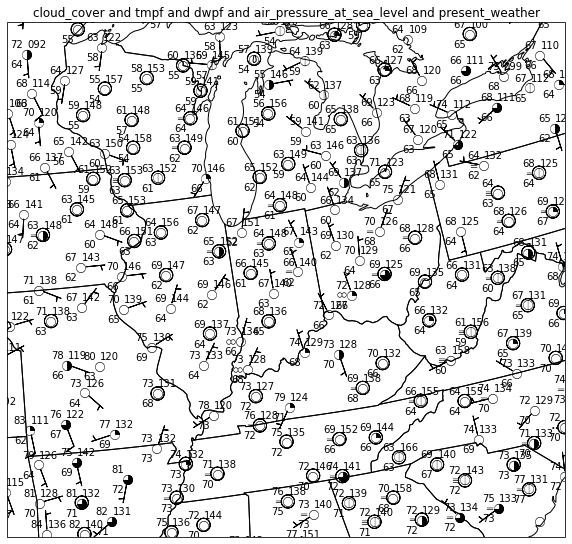

In [89]:
mslp_formatter = lambda v: format(v*10, '.0f')[-3:]
plot_time = datetime(2012, 8, 1, 12)

# Plot desired data
obs = declarative.PlotObs()
obs.data = df
obs.time = plot_time
obs.time_window = timedelta(minutes=8)
obs.level = None
obs.fields = ['cloud_cover', 'tmpf', 'dwpf',
              'air_pressure_at_sea_level', 'present_weather']
obs.locations = ['C', 'NW', 'SW', 'NE', 'W']
obs.formats = ['sky_cover', None, None, mslp_formatter, 'current_weather']
obs.reduce_points = .75
obs.vector_field = ['eastward_wind', 'northward_wind']

# Panel for plot with Map features
panel = declarative.MapPanel()
panel.layout = (1, 1, 1)
panel.projection = 'lcc'
panel.area = 'in'
panel.layers = ['states']
panel.plots = [obs]

# Bringing it all together
pc = declarative.PanelContainer()
pc.size = (10, 10)
pc.panels = [panel]

pc.show()

In [94]:
df[(df.valid >= plot_time - timedelta(minutes=15)) & (df.valid <= plot_time + timedelta(minutes=15))]

,station,valid,lon,lat,elevation,tmpf,dwpf,relh,drct,sknt,...,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,present_weather,cloud_cover,eastward_wind,northward_wind,air_pressure_at_sea_level
88589,CMGB,2012-08-01 11:45:00,-72.7739,45.3728,86.0,67.82,60.44,77.24,200.0,3.0,...,NaN,NaN,NaN,67.82,CMGB 011145Z AUTO 20003KT 20/16 RMK AO1 SLP105...,0,0,1.026060e+00,2.819078,1010.608402
88590,CRQ,2012-08-01 11:45:00,-117.2800,33.1300,100.0,64.40,60.80,88.09,0.0,0.0,...,NaN,NaN,NaN,64.40,KCRQ 011145Z AUTO 00000KT 8SM SCT009 18/16 A29...,0,4,-0.000000e+00,-0.000000,1015.742818
88591,CWA,2012-08-01 11:45:00,-89.6668,44.7776,389.0,57.20,57.20,100.00,0.0,0.0,...,NaN,NaN,NaN,57.20,KCWA 011145Z 00000KT 10SM SKC 14/14 A2998,0,0,-0.000000e+00,-0.000000,1015.502973
88592,BNW,2012-08-01 11:45:00,-93.8486,42.0486,349.3,63.68,60.98,90.92,0.0,0.0,...,NaN,NaN,NaN,63.68,KBNW 011145Z AUTO 00000KT 10SM CLR 18/16 A2997...,0,0,-0.000000e+00,-0.000000,1014.662131
88593,CGF,2012-08-01 11:45:00,-81.4864,41.5651,268.0,73.40,68.00,83.21,0.0,0.0,...,NaN,NaN,NaN,73.40,KCGF 011145Z 00000KT 20SM FEW035 SCT200 23/20 ...,0,2,-0.000000e+00,-0.000000,1012.532861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94434,TCL,2012-08-01 12:15:00,-87.6161,33.2119,52.0,75.20,75.20,100.00,0.0,0.0,...,NaN,NaN,NaN,77.12,KTCL 011215Z 00000KT 2SM BR BKN002 24/24 A2997...,10,6,-0.000000e+00,-0.000000,1015.007984
94435,THV,2012-08-01 12:15:00,-76.8730,39.9170,148.0,68.00,66.20,93.97,320.0,3.0,...,NaN,NaN,NaN,68.00,KTHV 011215Z AUTO 32003KT 2SM BR BKN004 20/19 ...,10,6,1.928363e+00,-2.298133,1012.491022
94436,TME,2012-08-01 12:15:00,-95.8979,29.8050,50.6,75.20,75.20,100.00,0.0,0.0,...,NaN,NaN,NaN,77.12,KTME 011215Z AUTO 00000KT 4SM BR CLR 24/24 A30...,10,0,-0.000000e+00,-0.000000,1016.030156
94437,VES,2012-08-01 12:15:00,-84.5319,40.2044,306.9,68.00,66.20,93.97,360.0,4.0,...,NaN,NaN,NaN,68.00,KVES 011215Z AUTO 36004KT 5SM BR CLR 20/19 A29...,10,0,9.797174e-16,-4.000000,1013.423527
